In [1]:
# importing the packages
%matplotlib inline      
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
try:
    connection = psycopg2.connect(user = "spyfu",
                                  password = "SpyfuU$3r",
                                  host = "18.219.13.131",
                                  port = "5432",
                                  database = "spyfu")
    cursor = connection.cursor()
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL ", error)
else:
    print("Connection established")

Connection established


In [3]:
date = "'2019-06-05'"

In [4]:
k = "select mcid, uuid from click_agg_poc where date_utc = " + date
print(k)

select mcid, uuid from click_agg_poc where date_utc = '2019-06-05'


In [5]:
cursor.execute(k)
day1 = cursor.fetchall()
week = day1
print(len(week))
print(len(day1))

31891
31891


In [6]:
week = pd.DataFrame(week)
day1 = pd.DataFrame(day1)
week.columns = ['MCID','UUID']
day1.columns = ['MCID','UUID']

In [7]:
len(day1)

31891

In [8]:
cursor.execute("select mcid, uuid from click_agg_poc where date_utc = '2019-06-06' ")
day2 = cursor.fetchall()
print(len(day2))

37400


In [9]:
day2 = pd.DataFrame(day2)
day2.columns = ['MCID','UUID']

In [10]:
week = week.append(day2);

In [11]:
len(week)

69291

In [12]:
cursor.execute("select mcid, uuid from click_agg_poc where date_utc = '2019-06-07'")
day3 = cursor.fetchall()
print(len(day3))

38171


In [13]:
day3 = pd.DataFrame(day3)
day3.columns = ['MCID','UUID']

In [14]:
week = week.append(day3);

In [15]:
cursor.execute("select mcid, uuid from click_agg_poc where date_utc = '2019-06-08'")
day4 = cursor.fetchall()
print(len(day4))

36215


In [16]:
day4 = pd.DataFrame(day4)
day4.columns = ['MCID','UUID']
week = week.append(day4)

In [17]:
cursor.execute("select mcid, uuid from click_agg_poc where date_utc = '2019-06-09'")
day5 = cursor.fetchall()
print(len(day5))

33481


In [18]:
day5 = pd.DataFrame(day5)
day5.columns = ['MCID','UUID']
week = week.append(day5);

In [19]:
cursor.execute("select mcid, uuid from click_agg_poc where date_utc = '2019-06-10'")
day6 = cursor.fetchall()
print(len(day6))

35776


In [20]:
day6 = pd.DataFrame(day6)
day6.columns = ['MCID','UUID']
week = week.append(day6);

In [21]:
cursor.execute("select mcid, uuid from click_agg_poc where date_utc = '2019-06-11'")
day7 = cursor.fetchall()
print(len(day7))

37745


In [22]:
day7 = pd.DataFrame(day7)
day7.columns = ['MCID','UUID']
week = week.append(day7);

In [23]:
len(week)

250679

In [24]:
week = week[week['UUID']!='undefined']
len(week)

246323

In [25]:
new = week.groupby(week.MCID)

In [26]:
week['UUID'].value_counts()

63f8e0fc8af6ce18                    349
1CFB5C1DCD9D49A6B10ACB67B686757B     76
527b87f3aa5f7f3f                     74
421973975339222e                     73
5f95920b82cf7a68                     65
d17c6a0b0647b8a3                     64
04302c6f6b943de8                     54
be8c9cf788e6768e                     51
7809e26eb105904b                     48
3472654434F641A285345B7D3A9F2BC3     47
ca55d6dbaabe6860                     46
fd7951feab742a57                     42
5772fffeed43fe99                     42
a20379f527f32d2c                     41
9b0625d28fe44294                     40
65ba7524f6412870                     40
7be3450e40c892b5                     39
6dbb8b5238d74956                     38
786b77affa0799ce                     38
d9f69b3b1b732b90                     37
91b9ac6043c093cf                     37
3713b8b8927f4090                     35
bf0651e3e05a71b8                     34
14355210dbe4a88f                     33
44ddcab9149bda0e                     32


In [27]:
week.nunique()

MCID        18
UUID    142474
dtype: int64

In [28]:
category = new.apply(lambda x:x['UUID'].unique())
category = pd.DataFrame(category)
category.columns = ['UUID']
#print(category)

In [29]:
top = {}
count = 0
for index,row in category.iterrows():
    top.update({index:0})
    for i in row:
        c = len(i)
    top[index]=c
    count = count+c
print(top)
#print(count)

{85: 1272, 87: 52224, 89: 19111, 282: 13714, 337: 22204, 368: 2233, 453: 6863, 460: 959, 480: 4324, 628: 4731, 633: 5556, 5099: 29, 5926: 2204, 32644: 16123, 34572: 751, 40442: 5625, 59031: 89, 66849: 3}


In [30]:
topCategory = [ [k,v] for k, v in top.items() ]
topCategory.sort(key = lambda x: x[1], reverse=True)  
print(topCategory) 

[[87, 52224], [337, 22204], [89, 19111], [32644, 16123], [282, 13714], [453, 6863], [40442, 5625], [633, 5556], [628, 4731], [480, 4324], [368, 2233], [5926, 2204], [85, 1272], [460, 959], [34572, 751], [59031, 89], [5099, 29], [66849, 3]]


In [31]:
df = pd.DataFrame(topCategory)
df.columns = ['MCID','Count']
print(len(df))

18


In [32]:
print(df)

     MCID  Count
0      87  52224
1     337  22204
2      89  19111
3   32644  16123
4     282  13714
5     453   6863
6   40442   5625
7     633   5556
8     628   4731
9     480   4324
10    368   2233
11   5926   2204
12     85   1272
13    460    959
14  34572    751
15  59031     89
16   5099     29
17  66849      3


In [33]:
cat = pd.read_csv("category_soka.csv")
cat = cat[['id','name']]
cat = pd.DataFrame(cat)
cat.columns = ['MCID','Name']
cat.head()

,MCID,Name
0,-1,Offers Page
1,0,Home Page
2,85,Computers
3,86,Kitchen Maha Mela
4,87,Fashion


In [34]:
cat.nunique()

MCID    51200
Name    20691
dtype: int64

In [35]:
result = pd.merge(df, cat, on='MCID')

In [36]:
len(result)

18

In [37]:
result

,MCID,Count,Name
0,87,52224,Fashion
1,337,22204,Home & Kitchen
2,89,19111,Footwear
3,32644,16123,Mobile & Laptop Accessories
4,282,13714,Jewelry & Watches
5,453,6863,Mobiles & Tablets
6,40442,5625,Sports & Health
7,633,5556,"Toys, Baby & Kids"
8,628,4731,Automotive
9,480,4324,Beauty & Perfumes


In [38]:
final = result.head(10)
final

,MCID,Count,Name
0,87,52224,Fashion
1,337,22204,Home & Kitchen
2,89,19111,Footwear
3,32644,16123,Mobile & Laptop Accessories
4,282,13714,Jewelry & Watches
5,453,6863,Mobiles & Tablets
6,40442,5625,Sports & Health
7,633,5556,"Toys, Baby & Kids"
8,628,4731,Automotive
9,480,4324,Beauty & Perfumes


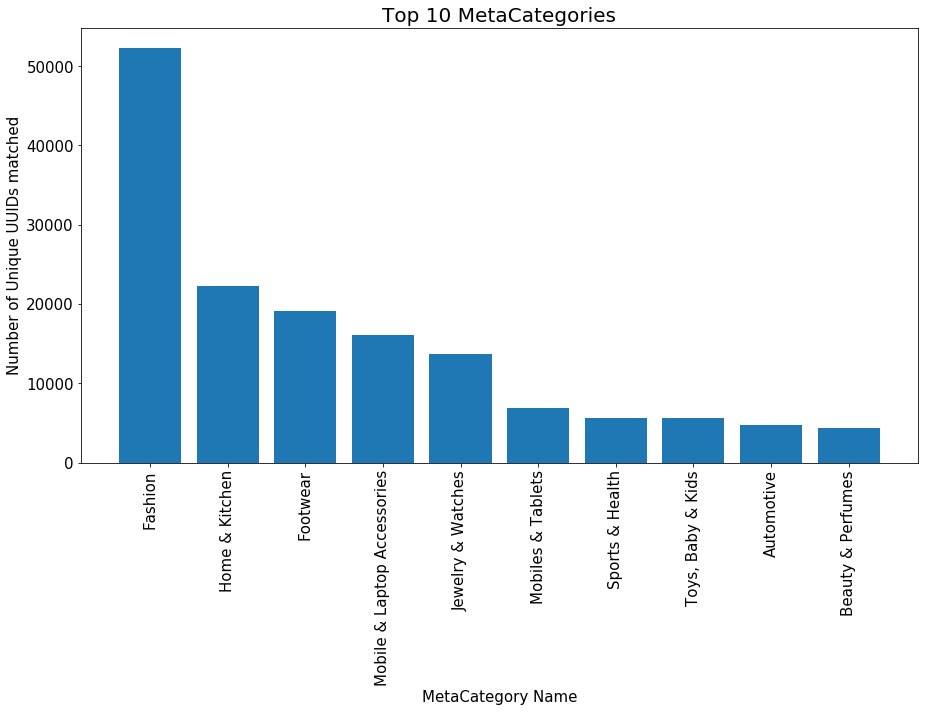

In [39]:
f, ax = plt.subplots(figsize=(15, 8)) 
y_pos = np.arange(10)
plt.bar(y_pos, final['Count'])
plt.xticks(y_pos, final['Name'],fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.xlabel('MetaCategory Name',fontsize=15)
plt.ylabel('Number of Unique UUIDs matched',fontsize=15)
plt.title('Top 10 MetaCategories',fontsize=20)
plt.show()